In [1]:
import odes as od
import numpy as np
import matplotlib.pyplot as plt

# Classwork 11: Ordinary Differential Equations

Trevor Kling
11/8/2018

## Introduction

In this module, we analyze the variety of methods that can be used to compute ordinary differential equations.  The methods are primarily compared in terms of number of divisions of a given interval required to produce an accurate graph.  For each method, the equations $\cos(t)$ and $-\sin(t)$ are computed over a range of $[0, 10\pi]$ with a number of divisions equal to the input for $N$.  Each $N$ value was then tweaked until an accurate graph was obtained.

## Graphs

In [2]:
# Creating a "Plot" fuction
def plotter(setVals, N, title1):
    plt.figure(figsize=(8,6))
    a = plt.axes()
    set1 = [x[0] for x in setVals]
    set2 = [x[1] for x in setVals]
    a.plot(np.arange(0, 10*np.pi, 2*np.pi/N), set1[0:-1], label="$\cos(t)$")
    a.plot(np.arange(0, 10*np.pi, 2*np.pi/N), set2[0:-1], label="$\sin(t)$")
    a.set(xlabel = "t", ylabel="f(t)", title=title1)
    a.legend()
    a.grid
    plt.show()

A simple plotting function is defined above to make discussions more concise.

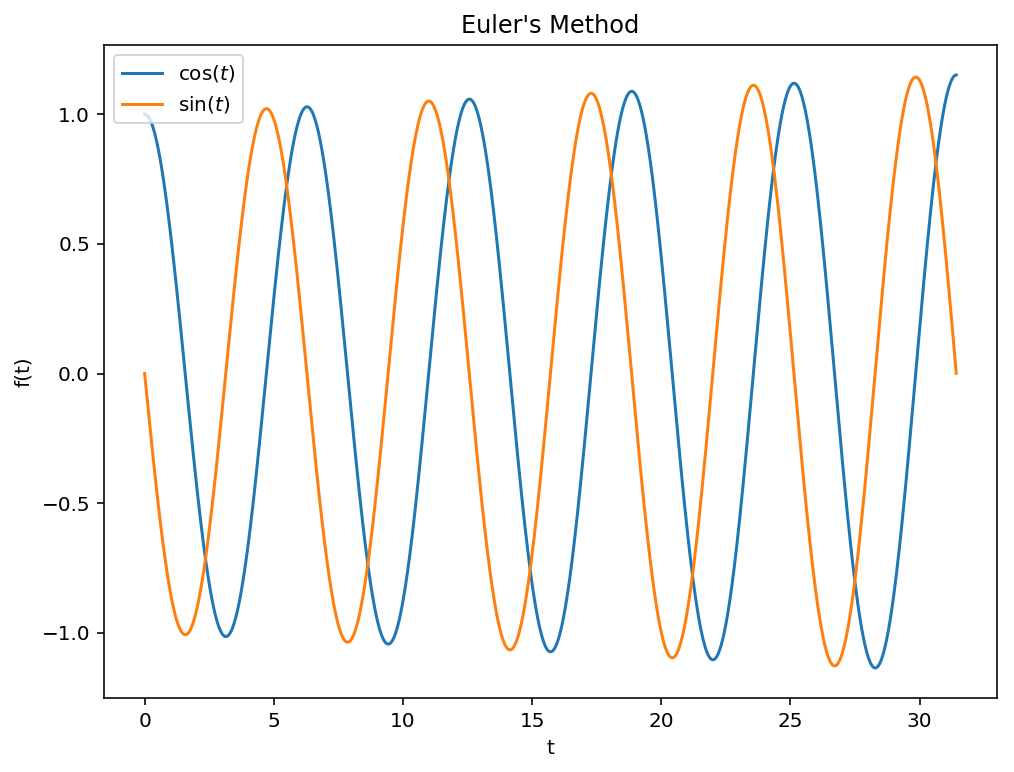

In [3]:
N1 = 700
plotter((od.euler(N1, np.array([1, 0]))), N1, "Euler's Method")

The first run of the program used Euler's Method to approximate the graph.  Euler's method is extremely susceptible to diverence, so a very large number of runs was required for the program to remain an accurate approximation.  700 may not be perfectly optimized, however it mainly serves as a benchmark for the following methods.

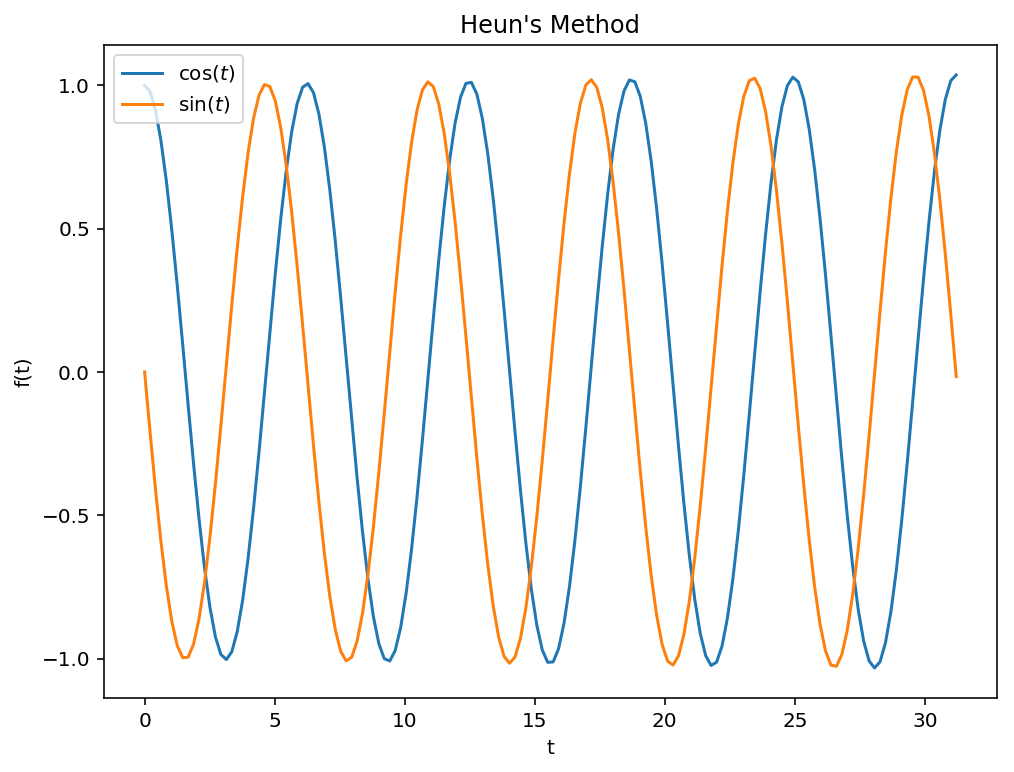

In [4]:
N2 = 30
plotter(od.heun(N2, np.array([1, 0])), N2, "Heun's Method")

Clearly, in the second method used, performance improves dramatically.  The program only requires thirty divisions to return an accurate approximation, and diverges less than Euler's method regardless.

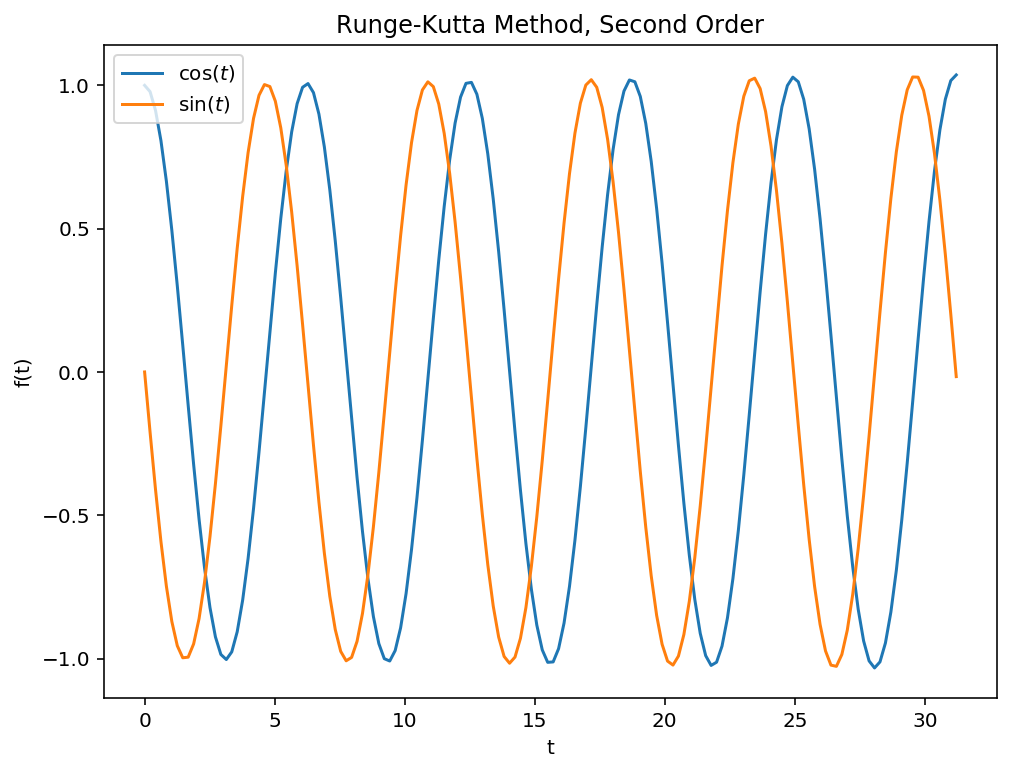

In [5]:
N3 = 30
plotter(od.rungeKuttaSecond(N3, np.array([1, 0])), N3, "Runge-Kutta Method, Second Order")

Interestingly, the second-order Runge Kutta Method finds a similar degree of accuracy as the previous Heun's method.  Both methods are accurate to the second order, so it is not particularly shocking that both see a similar number of divisions.  The graphs for this method appear a bit better rounded, but the approximation is largely the same.

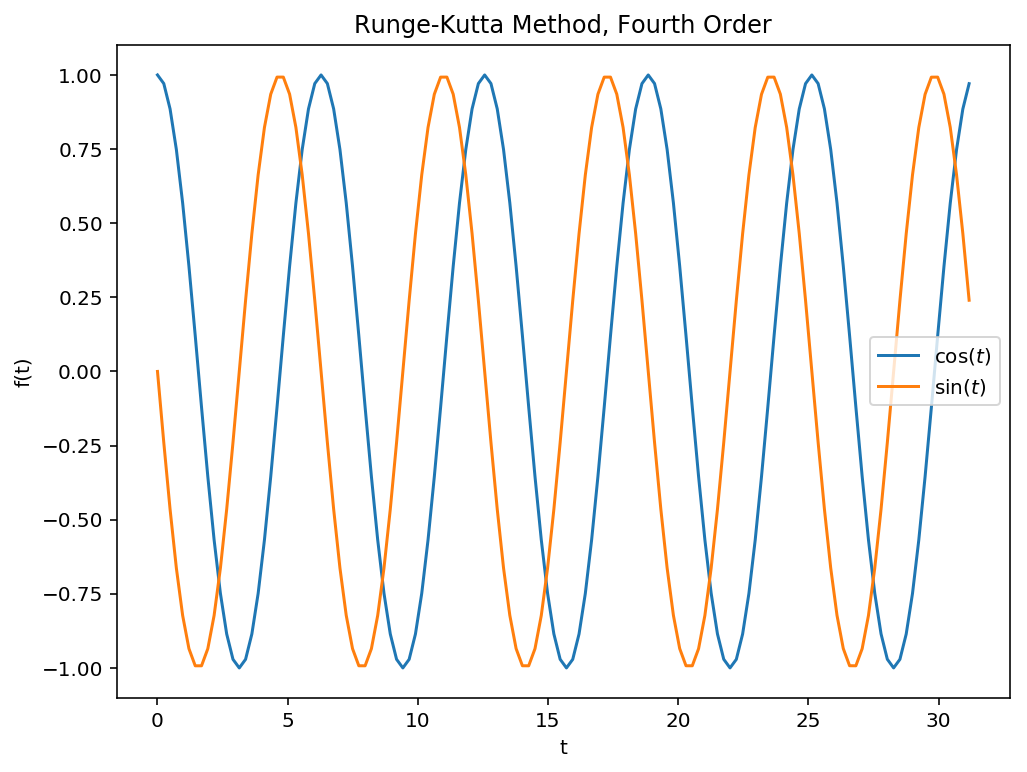

In [6]:
N4 = 26
plotter(od.rungeKuttaFourth(N4, np.array([1, 0])), N4, "Runge-Kutta Method, Fourth Order")

The fourth-order Runge Kutta method sees a slight improvement in number of runs required, shaving off another four divisions for an equivalent approximation.  The impact of each of these methods is likely muted by the fact that the functions use $\sin$ and $\cos$; a function like $x^4$ would likely see a greater impact from more accurate methods, as it diverges faster than $\sin$ or $\cos$.